In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#there are multiple NaN values that will have to be processed

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.value_counts()

Loan_ID   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP002990  Female  No       0           Graduate   Yes            4583             0.0                133.0       360.0             0.0             Semiurban      N              1
LP002984  Male    Yes      2           Graduate   No             7583             0.0                187.0       360.0             1.0             Urban          Y              1
LP001664  Male    No       0           Graduate   No             4191             0.0                120.0       360.0             1.0             Rural          Y              1
LP001665  Male    Yes      1           Graduate   No             3125             2583.0             170.0       360.0             1.0             Semiurban      N              1
LP001666  Male    No       0           Graduate   No             8333             3750.0             187.0    

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
for i in ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [13]:
imp=SimpleImputer(strategy='mean')
for i in ['LoanAmount']:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [15]:
cat_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [16]:
df=df.iloc[:,1:]
#LoanID is just random numbers

In [17]:
cat_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

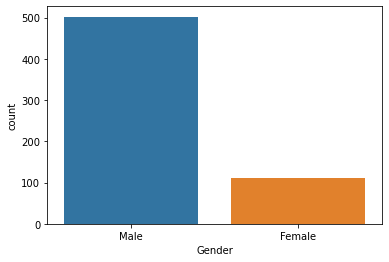

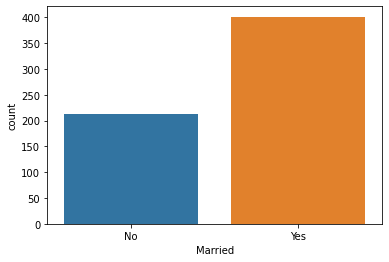

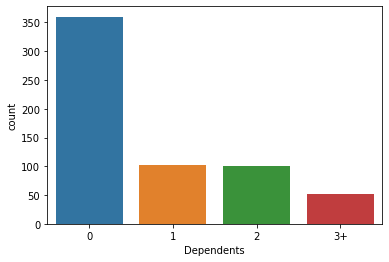

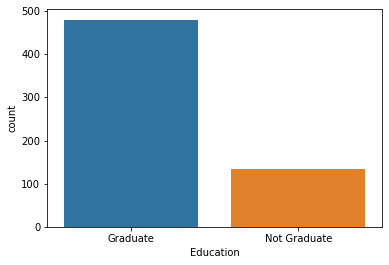

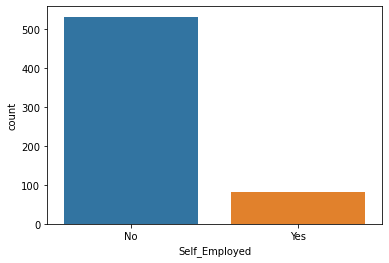

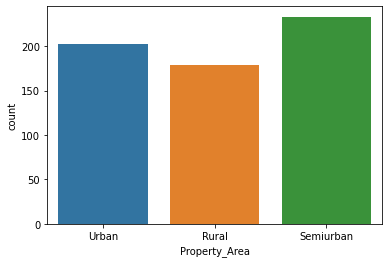

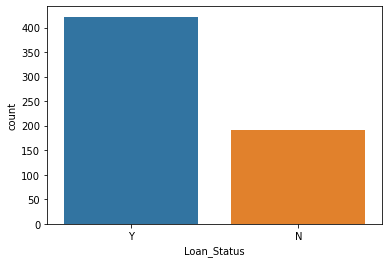

In [18]:
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

In [19]:
#Married ,Male,People having no dependents who are not self employed and are Graduates have taken more loans

In [20]:
#Since the output is not balanced we can use smote

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [24]:
#data is highly spread

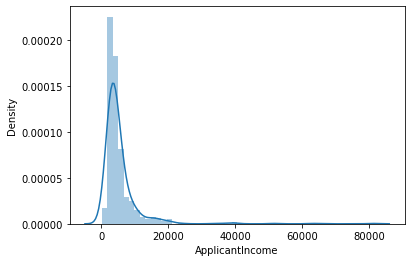

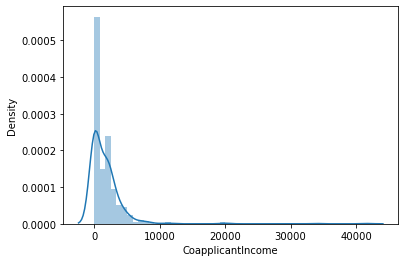

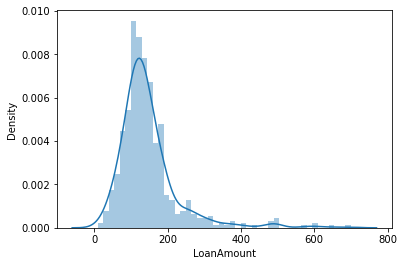

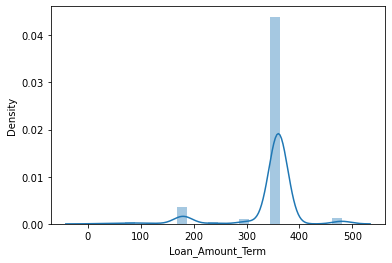

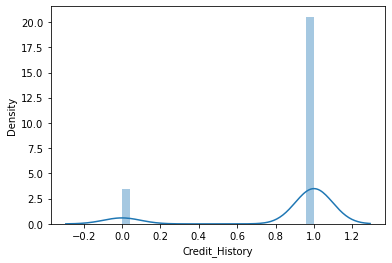

In [27]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
    sns.distplot(df[i])
    plt.show()

In [28]:
#data is skewed

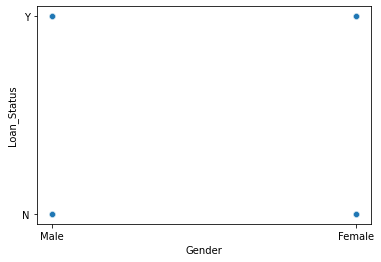

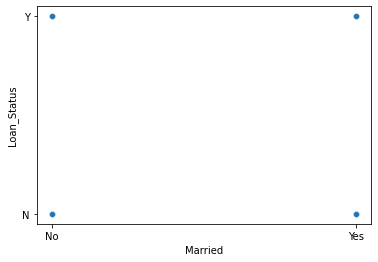

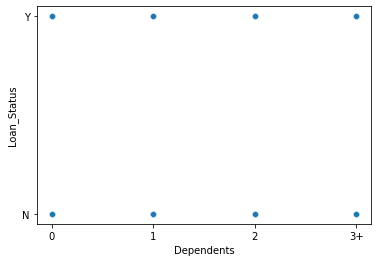

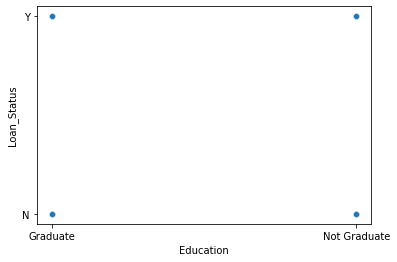

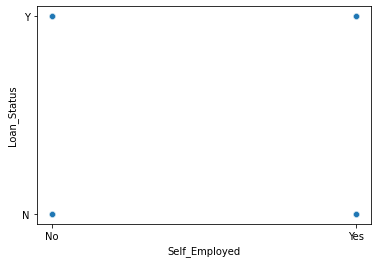

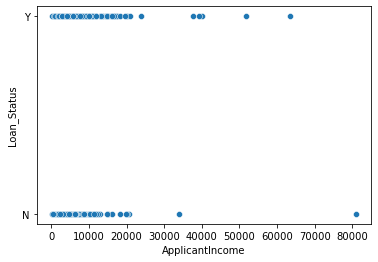

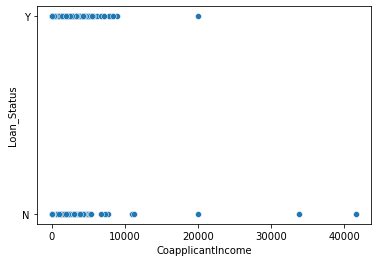

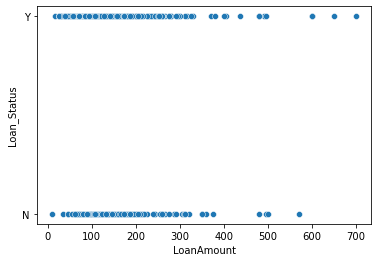

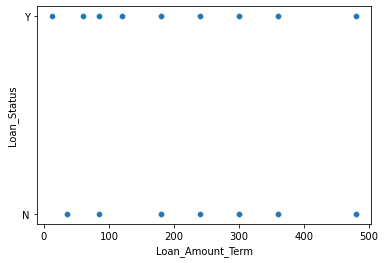

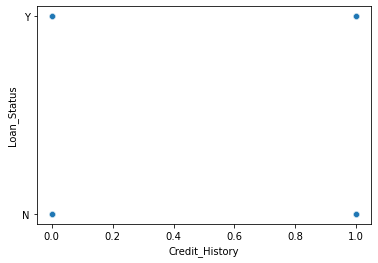

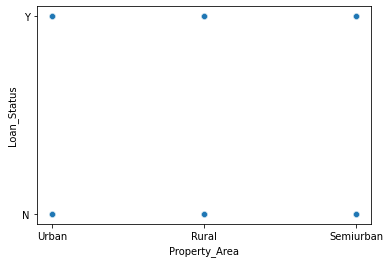

In [29]:
cols=df.columns
for i in cols[:-1]:
    sns.scatterplot(x=df[i],y=df['Loan_Status'])
    plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

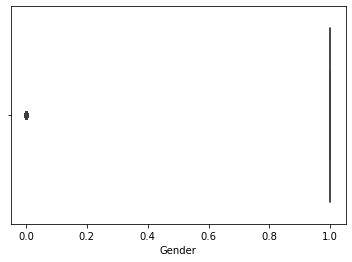

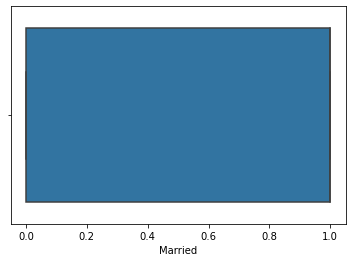

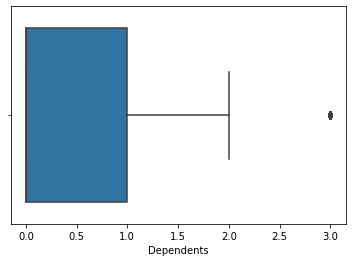

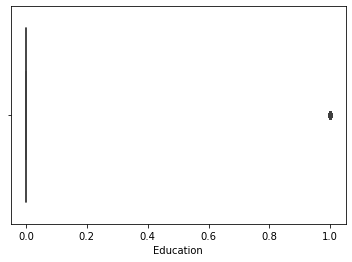

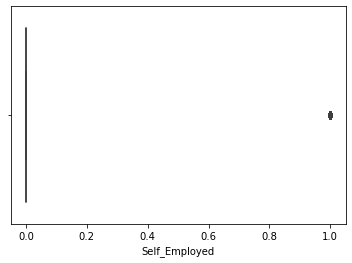

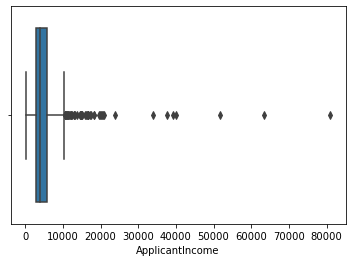

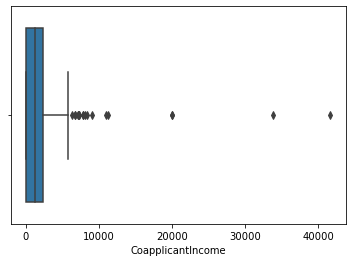

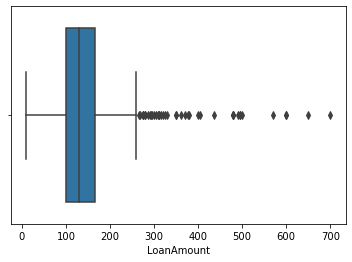

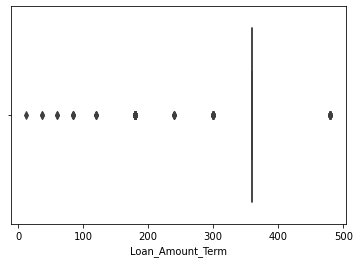

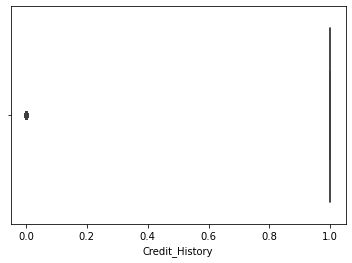

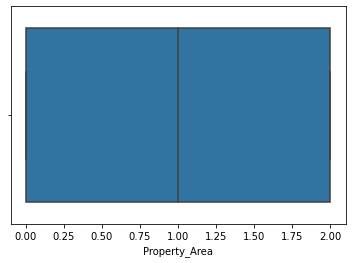

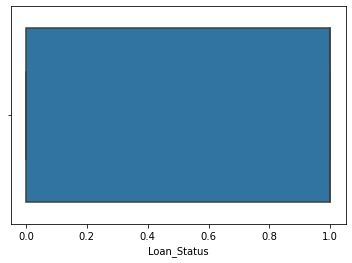

In [32]:
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [33]:
#there are a few outliers

In [34]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [35]:
#there is alot of skewness in data which will be removed by yeo-johnson later

In [36]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


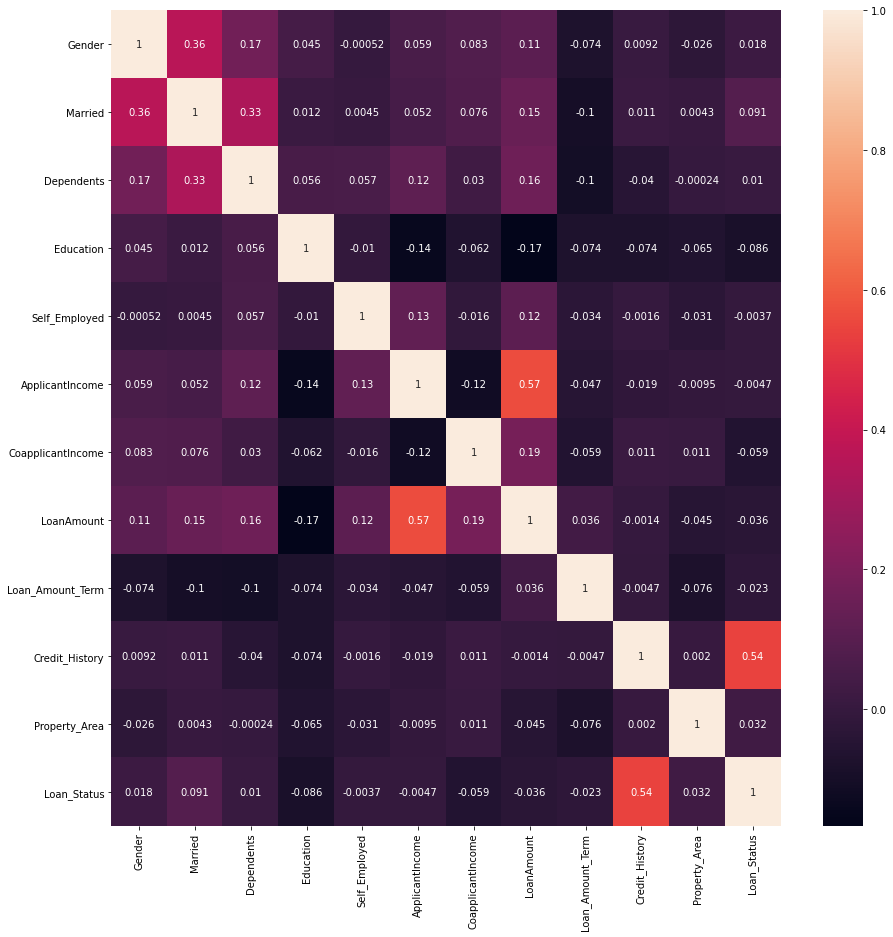

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [38]:
#check multicolinearity
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif['VIF Factor']=[viff(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [39]:
calc_vif(x)

,variables,VIF Factor
0,Gender,6.003428
1,Married,3.654835
2,Dependents,1.791861
3,Education,1.306142
4,Self_Employed,1.176661
5,ApplicantIncome,2.889241
6,CoapplicantIncome,1.480396
7,LoanAmount,6.849968
8,Loan_Amount_Term,10.322123
9,Credit_History,6.058628


In [41]:
#Loan_Amount_Term is very colinear,Hence removing it
df.drop(['Loan_Amount_Term'],axis=1,inplace=True)

In [42]:
from scipy.stats import zscore
z=zscore(df)

In [43]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    df1=df.copy()
    df_new=df[(z<i).all(axis=1)]
    loss=((df1.shape[0]-df_new.shape[0])*100)/df1.shape[0]
    print ("At i",i," loss % is",loss)

At i 3  loss % is 4.071661237785016
At i 3.2  loss % is 3.420195439739414
At i 3.4  loss % is 3.420195439739414
At i 3.6  loss % is 3.257328990228013
At i 3.8  loss % is 3.257328990228013
At i 4.0  loss % is 2.768729641693811
At i 4.2  loss % is 2.44299674267101
At i 4.4  loss % is 2.2801302931596092
At i 4.6  loss % is 2.2801302931596092
At i 4.8  loss % is 2.1172638436482085


In [44]:
#Can take threshold as 3

In [45]:
df=df[(z<3).all(axis=1)]

In [46]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [47]:
x.shape,y.shape

((589, 10), (589,))

In [48]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [49]:
x.shape,y.shape

((814, 10), (814,))

In [50]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in df.columns:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))
    elif np.abs(df[i].skew())<-0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

In [51]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
lg=LogisticRegression()
x_train=x
y_train=y
x_test=x
y_test=y
acc=0
r_state=0
for i in (0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred=lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc=accuracy_score(t_y,pred)
        x_train=tr_x
        x_test=t_x
        y_train=tr_y
        y_test=t_y
        r_state=i
print("At random state",r_state,"accuracy score is maximum i.e.,",acc)

At random state 1000 accuracy score is maximum i.e., 0.7730061349693251


In [54]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print("Accuracy score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification report\n",classification_report(y_test,pred))

In [55]:
fun(lg)

Accuracy score 0.7730061349693251
Confusion Matrix
 [[55 29]
 [ 8 71]]
Classification report
               precision    recall  f1-score   support

           0       0.87      0.65      0.75        84
           1       0.71      0.90      0.79        79

    accuracy                           0.77       163
   macro avg       0.79      0.78      0.77       163
weighted avg       0.79      0.77      0.77       163



In [56]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross val score",score)
    print(score.mean())

In [57]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model):
    gd=GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [58]:
cvs(lg)

Cross val score [0.77300613 0.77300613 0.82208589 0.77300613 0.79012346]
0.7862455502537302


In [59]:
acc=[77.30]
CVS=[78.62]
model=['Lgistic Regression']

In [60]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [61]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [62]:
from sklearn.svm import SVC
params_svc={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


In [63]:
svc=SVC(degree=1,gamma='scale',kernel='rbf',shrinking=True)
fun(svc)
cvs(svc)

Accuracy score 0.754601226993865
Confusion Matrix
 [[50 34]
 [ 6 73]]
Classification report
               precision    recall  f1-score   support

           0       0.89      0.60      0.71        84
           1       0.68      0.92      0.78        79

    accuracy                           0.75       163
   macro avg       0.79      0.76      0.75       163
weighted avg       0.79      0.75      0.75       163

Cross val score [0.71165644 0.79754601 0.76687117 0.82208589 0.79012346]
0.7776565931985154


In [64]:
acc.append(75.46)
CVS.append(77.77)
model.append('SVC')

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
params_dtc={'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtc,dtc)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [66]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_split=2,splitter='best')
fun(dtc)
cvs(dtc)

Accuracy score 0.7239263803680982
Confusion Matrix
 [[41 43]
 [ 2 77]]
Classification report
               precision    recall  f1-score   support

           0       0.95      0.49      0.65        84
           1       0.64      0.97      0.77        79

    accuracy                           0.72       163
   macro avg       0.80      0.73      0.71       163
weighted avg       0.80      0.72      0.71       163

Cross val score [0.80368098 0.73006135 0.79141104 0.78527607 0.79012346]
0.7801105809285768


In [67]:
CVS.append(78.01)
acc.append(72.39)
model.append('Decision Tree')

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 9, 'weights': 'distance'}


In [69]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=9,weights='distance')
fun(knn)
cvs(knn)

Accuracy score 0.7668711656441718
Confusion Matrix
 [[59 25]
 [13 66]]
Classification report
               precision    recall  f1-score   support

           0       0.82      0.70      0.76        84
           1       0.73      0.84      0.78        79

    accuracy                           0.77       163
   macro avg       0.77      0.77      0.77       163
weighted avg       0.77      0.77      0.77       163

Cross val score [0.7791411  0.77300613 0.7791411  0.79754601 0.71604938]
0.768976747708854


In [70]:
CVS.append(76.68)
acc.append(76.89)
model.append('K Neighbors')

In [71]:
fun(gb)
cvs(gb)

Accuracy score 0.7484662576687117
Confusion Matrix
 [[50 34]
 [ 7 72]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.60      0.71        84
           1       0.68      0.91      0.78        79

    accuracy                           0.75       163
   macro avg       0.78      0.75      0.74       163
weighted avg       0.78      0.75      0.74       163

Cross val score [0.78527607 0.82822086 0.76687117 0.71779141 0.79012346]
0.7776565931985154


In [72]:
CVS.append(77.77)
acc.append(74.85)
model.append('Gaussian NB')

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
params_rf={'n_estimators':[10,20,100,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 3, 'n_estimators': 100}


In [74]:
rf=RandomForestClassifier(criterion='entropy',max_depth=None,min_samples_split=3,n_estimators=100)
fun(rf)
cvs(rf)

Accuracy score 0.7975460122699386
Confusion Matrix
 [[59 25]
 [ 8 71]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        84
           1       0.74      0.90      0.81        79

    accuracy                           0.80       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.81      0.80      0.80       163

Cross val score [0.86503067 0.82208589 0.80368098 0.84662577 0.85185185]
0.8378550329470574


In [75]:
CVS.append(83.79)
acc.append(79.75)
model.append('random Forest')

In [76]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()
params_etc={'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_etc,etc)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}


In [77]:
etc=ExtraTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=2,splitter='best')
fun(etc)
cvs(etc)

Accuracy score 0.7177914110429447
Confusion Matrix
 [[61 23]
 [23 56]]
Classification report
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        84
           1       0.71      0.71      0.71        79

    accuracy                           0.72       163
   macro avg       0.72      0.72      0.72       163
weighted avg       0.72      0.72      0.72       163

Cross val score [0.72392638 0.73006135 0.74233129 0.79141104 0.80864198]
0.7592744073316671


In [78]:
CVS.append(75.93)
acc.append(71.77)
model.append('Extra Tree')

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
params_ada={'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 20, 'random_state': 43}


In [80]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.9,n_estimators=20,random_state=43)
fun(ada)
cvs(ada)

Accuracy score 0.7668711656441718
Confusion Matrix
 [[50 34]
 [ 4 75]]
Classification report
               precision    recall  f1-score   support

           0       0.93      0.60      0.72        84
           1       0.69      0.95      0.80        79

    accuracy                           0.77       163
   macro avg       0.81      0.77      0.76       163
weighted avg       0.81      0.77      0.76       163

Cross val score [0.80981595 0.77300613 0.82822086 0.80981595 0.72839506]
0.7898507914867833


In [81]:
CVS.append(78.99)
acc.append(76.69)
model.append('Ada Boost')

In [86]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['Accuracy']=acc
diff=[]
for i in range(0,len(acc)):
    diff.append(acc[i]-CVS[i])
res['diff']=diff
res

,Models,CVS,Accuracy,diff
0,Lgistic Regression,78.62,77.30,-1.32
1,SVC,77.77,75.46,-2.31
2,Decision Tree,78.01,72.39,-5.62
3,K Neighbors,76.68,76.89,0.21
4,Gaussian NB,77.77,74.85,-2.92
5,random Forest,83.79,79.75,-4.04
6,Extra Tree,75.93,71.77,-4.16
7,Ada Boost,78.99,76.69,-2.30


In [87]:
import pickle
filename='Loan Status.pkl'
pickle.dump(knn,open(filename,'wb'))

In [88]:
predict=knn.predict(x_test)

In [89]:
output=pd.DataFrame()
output['Actual']=y_test
output['Predicted']=predict
output

,Actual,Predicted
258,1,1
26,1,1
443,1,1
33,0,0
492,1,1
...,...,...
545,0,0
628,0,0
157,0,1
624,0,1


In [91]:
output.to_csv('Loan_Status.csv')

In [92]:
from sklearn.metrics import roc_curve,roc_auc_score

In [93]:
y_pred_prob=knn.predict_proba(x_test)[:,1]

In [94]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

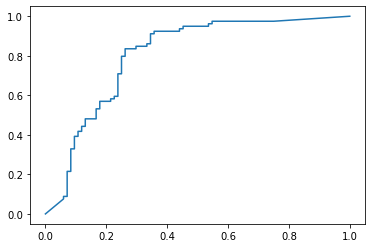

In [95]:
plt.plot(fpr,tpr)
plt.show()